# Sales Reporting Exploratory Data

## Import Package and Load Data

In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Data merupakan 200.000 poin data penjualan untuk menjawab pertanyaan terkait pendapatan untuk bisnis

## Merge Data

In [37]:
path = 'D:/data fanny/Fanny/KULIAH STATISTIKA/ASLAB ADW 1 2022/Python/Sales Reporting/'

frames = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
        length_1month = len(df1.index)
        all_length.append(length_1month)
        
df = result
df.to_csv('annualSales2019.csv', index=False)

Menambahkan Kolom 'Month'

In [38]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## Preprocessing: Menghilangkan data null/NA

In [39]:
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## Melihat pada bulan keberapa terjadi penjualan tertinggi?

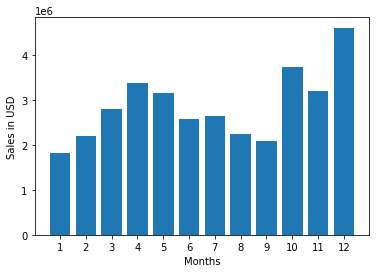

In [40]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.groupby('Month').sum()['Sales']
sales_value = df.groupby('Month').sum()['Sales']
months = range(1,13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

Berdasarkan grafik di atas, diketahui bahwa bulan dengan total penjualan tertinggi tahun 2019 adalah pada bulan ke-12 atau bulan desember

## Mengetahui kota mana dengan penjualan tertinggi?

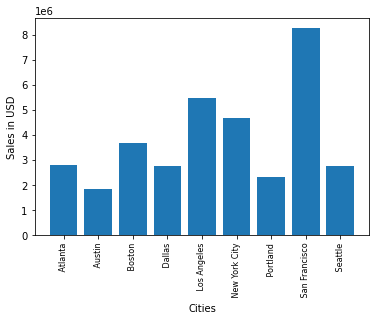

In [41]:
address_to_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)
df.groupby('City').sum()['Sales']
sales_value_city = df.groupby('City').sum()['Sales']
cities = [city for city, sales in sales_value_city.items()]
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

Diperoleh hasil bahwa kota dengan tingkat perjualan tertinggi terdapat pada Kota San Fransisco, disusul dengan kota Los Angeles, New York, Boston, dan seterusnya

## Waktu yang tepat untuk menampilkan iklan agar memaksimalkan kemungkinan pelanggan membeli produk?

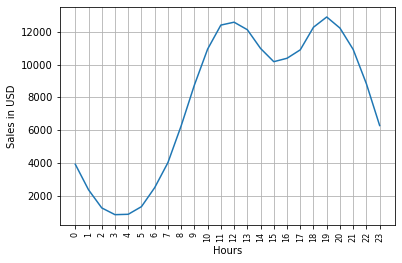

In [42]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

Dari grafik, diperoleh hasil bahwa waktu yang tepat untuk menampilkan iklan produk berdasarkan tingkat penjualan yang diperoleh adalah sekitar jam 11-12 dan jam 18.

## Produk mana yang sering terjual bersamaan?

In [44]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

<ipython-input-44-6bfa639f3c19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

Dari hasil di atas, diketahui bahwa Iphone dan Lightning Charging Cable terjual bersamaan dengan jumlah 882 penjualan, dan seterusnya

## Produk mana dengan penjualan tertinggi?

<ipython-input-45-a6208583f2f8>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


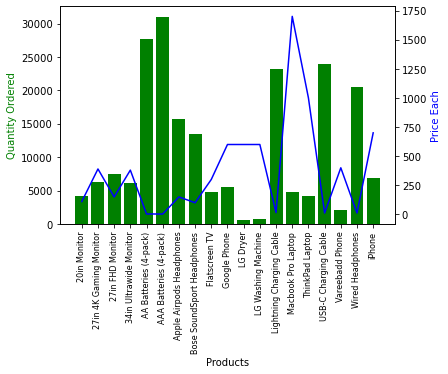

In [45]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()

produk dengan jumlah penjualan tertinggi adalah AA dan AAA Batteries.